# 자연어처리를 학습합니다


###텍스트 전처리
  * 차원의저주
  * 대소문자 통일
  * 정규표현식
  * SpaCy 라이브러리
  * 불용어 처리
  * 통계적 트리밍
  * 어간 추출
  * 표제어 추출

3. 유사도 분석  

## 차원의 저주

특성의 개수가 선형적으로 늘어날 떄, 동일한 설명력을 지니기 위해서는 데이터가 더 많이 필요하다. 만약 데이터가 동일할 때 차원이 늘어난다면 설명력이 더 떨어지게 된다.
NLP에서 차원은 곧 말뭉치에 존재하는 전체 단어의 수가 되므로, 단어의 종류를 줄여주어야 차원의 저주를 해결할 수 있다. 

차원의 저주를 해소하는 방법:
1. 대소문자 통일
2. 구두점, 특수문자 등 의미없는 문자 제거
3. 불용어 제거
4. 중복 단어 제거 등  

차원의 저주 해소를 위한 접근 (=전처리)
1. 대소문자 통일
2. 정규표현식 사용
3. 토크나이징 (SpaCy 라이브러리 등)
4. 불용어 처리
5. 통계적 트리밍
6. 단어 정규화 (어간추출, 표제어추출)

### 1. 대소문자 통일 예시 

In [61]:
# 샘플 데이터 임포팅
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19_sample.csv')

In [62]:
pd.set_option('display.max_columns', None)

In [63]:
df.head(3)

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,25971,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",NaN,True,NaN,0.0,3,http://reviews.bestbuy.com/3545/5620410/review...,Though I have got it for cheap price during bl...,An average Fire tablet,Ganamurthy,http://reviews.bestbuy.com/3545/5620410/review...
1,19398,AVwjfXqqQMlgsOJE8qmm,2017-05-20T01:34:04Z,2019-02-25T02:23:15Z,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",B01J94SCAM,Amazon,"Fire Tablets,Tablets,Amazon Tablets,Computers ...",Electronics,https://www.barcodable.com/images/barcode/0841...,amazonfirehd8kidsedition8tablet32gb7thgenerati...,Amazon,53-005705,2017-06-22T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",NaN,True,NaN,17.0,5,http://reviews.bestbuy.com/3545/5836204/review...,"I purchased the 7"" for my son when he was 1.5 ...",3 year old loves it,dcc1970,https://reviews.bestbuy.com/3545/5836204/revie...
2,2410,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2015-04-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Great price and great batteries! I will keep o...,Five Stars,ByDena,"https://www.barcodable.com/upc/841710106442,ht..."


In [64]:
df['brand'].value_counts()

Amazon          5977
Amazonbasics    4499
AmazonBasics       7
Name: brand, dtype: int64

In [65]:
# 같은 AmazonBasics가 다르게 분류되었기에 이를 통일함
# 데이터를 모두 소문자로 변환
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['brand'].value_counts()

amazon          5977
amazonbasics    4506
Name: brand, dtype: int64

### 2. 정규표현식 예시

In [66]:
import re
sample_string = "(Natural Language Processing) is easy!, AI!\n"
regrex = r'[^a-zA-Z0-9 ]' # 영문 대소문자, 숫자, 공백이 아닌 것
subst = ''                # 을 없애버리겠다

resualt = re.sub(regrex, subst, sample_string)
resualt

'Natural Language Processing is easy AI'

### 3. 토크나이징 예시 

In [67]:
df['reviews.text'].head(3)

0    Though I have got it for cheap price during bl...
1    I purchased the 7" for my son when he was 1.5 ...
2    Great price and great batteries! I will keep o...
Name: reviews.text, dtype: object

In [68]:
# 특수문자 등 제거
def preprocessing(string):
  string = re.sub('[^0-9a-zA-Z ]', '', string) # 숫자, 영문자, 공백을 제외하고 모두 제거 
  string = string.lower() # 소문자로 치환 
  string = string.split() # 공백을 기준으로 토크나이징 
  return string

df['tokenized_review'] = df['reviews.text'].apply(preprocessing)
df[['reviews.text', 'tokenized_review']].head()

,reviews.text,tokenized_review
0,Though I have got it for cheap price during bl...,"[though, i, have, got, it, for, cheap, price, ..."
1,"I purchased the 7"" for my son when he was 1.5 ...","[i, purchased, the, 7, for, my, son, when, he,..."
2,Great price and great batteries! I will keep o...,"[great, price, and, great, batteries, i, will,..."
3,Great tablet for kids my boys love their table...,"[great, tablet, for, kids, my, boys, love, the..."
4,They lasted really little.. (some of them) I u...,"[they, lasted, really, little, some, of, them,..."


In [69]:
# 토큰화 결과 분석
from collections import Counter

def word_count(docs):
  """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
  Args:
      docs (series or list): 토큰화된 문서가 들어있는 list
  Returns:
      list: Dataframe
  """
  # 전체 코퍼스에서 단어 빈도 카운트
  word_counts = Counter()

  # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
  word_in_docs = Counter()

  # 전체 문서의 갯수
  total_docs = len(docs)

  for doc in docs:
      word_counts.update(doc)
      word_in_docs.update(set(doc))

  temp = zip(word_counts.keys(), word_counts.values())

  wc = pd.DataFrame(temp, columns = ['word', 'count'])

  # 단어의 순위
  # method='first': 같은 값의 경우 먼저나온 요소를 우선
  wc['rank'] = wc['count'].rank(method='first', ascending=False)
  total = wc['count'].sum()

  # 코퍼스 내 단어의 비율
  wc['percent'] = wc['count'].apply(lambda x: x / total)

  wc = wc.sort_values(by='rank')

  # 누적 비율
  # cumsum() : cumulative sum
  wc['cul_percent'] = wc['percent'].cumsum()

  temp2 = zip(word_in_docs.keys(), word_in_docs.values())
  ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
  wc = ac.merge(wc, on='word')
  
  # 전체 문서 중 존재하는 비율
  wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

  return wc.sort_values(by='rank')

In [70]:
wc = word_count(df['tokenized_review'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
45,the,4909,10514,1.0,0.039353,0.039353,0.468282
16,and,5064,8137,2.0,0.030456,0.069809,0.483068
9,i,3781,7465,3.0,0.027941,0.097750,0.360679
148,to,4157,7150,4.0,0.026762,0.124512,0.396547
6,for,4477,6617,5.0,0.024767,0.149278,0.427072
38,a,3907,6421,6.0,0.024033,0.173312,0.372699
25,it,3548,6096,7.0,0.022817,0.196128,0.338453
80,my,3229,4119,8.0,0.015417,0.211545,0.308023
4,is,2782,4111,9.0,0.015387,0.226932,0.265382
17,this,2943,3752,10.0,0.014043,0.240976,0.280740


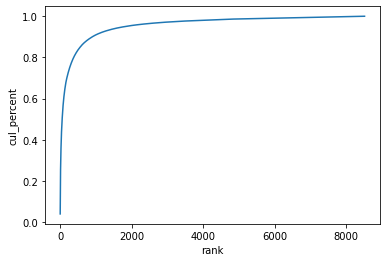

In [71]:
# 시각화1
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [72]:
# 시각화2
!pip install squarify
import squarify
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


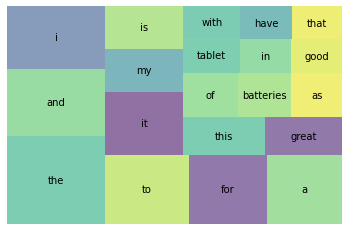

In [73]:
wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

### SpaCy 라이브러리를 활용한 간소화 과정


In [74]:
import spacy
from spacy.tokenizer import Tokenizer

# spacy 모델 불러오기 
nlp = spacy.load('en_core_web_sm')

# 모델에 사용한 토크나이저 임포트
tokenizer = Tokenizer(nlp.vocab)

In [75]:
# 토큰화를 위한 파이프라인을 구성

tokens = []

for doc in tokenizer.pipe(df['reviews.text']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    tokens.append(doc_tokens)

df['tokenized_review'] = tokens
df['tokenized_review'].head()

0    [though, i, have, got, it, for, cheap, price, ...
1    [i, purchased, the, 7, for, my, son, when, he,...
2    [great, price, and, great, batteries, i, will,...
3    [great, tablet, for, kids, my, boys, love, the...
4    [they, lasted, really, little, some, of, them,...
Name: tokenized_review, dtype: object

### 불용어 처리 예시 

In [76]:
STOP_WORDS = nlp.Defaults.stop_words
tokens = []

for doc in tokenizer.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokenized_review'] = tokens

In [84]:
wc = word_count(df['tokenized_review'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
64,great,2709,3080,1.0,0.023660,0.023660,0.258418
77,batteries,1454,2073,2.0,0.015925,0.039585,0.138701
11,good,1688,1870,3.0,0.014365,0.053950,0.161023
66,tablet,1469,1752,4.0,0.013459,0.067409,0.140132
69,love,1183,1287,5.0,0.009887,0.077296,0.112849


In [85]:
# 불용어를 리스트로 지정할 수도 있지만, 디폴트 불용어값을 사용 및 편집하여 사용 가능하다
STOP_WORDS = nlp.Defaults.stop_words # 디폴트 불용어
STOP_WORDS.union(['a', 'b', 'c']) # 디폴트 불용어는 set() 클래스이므로 add, union 사용 가능

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'c',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'f

### 통계적 트리밍 예시 
불용어를 직접 선택하는 것도 좋지만, 빈도를 보고 토큰을 일부 제거하는 방법도 있다. 

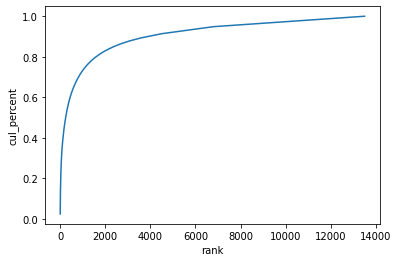

In [86]:
# 너무 자주 나타나는 단어 => 조사 등, 설명력 없는 토큰일 가능성 높음
# 너무 희귀한 단어 => 너무 드물어서 큰 의미가 없는 토큰일 가능성 높음
# 따라서 적당한 기준을 설정해야 한다.
sns.lineplot(x='rank', y='cul_percent', data=wc)

In [87]:
# 기준 정하기 위한 통찰
wc.tail(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
13481,functionalities,1,1,13482.0,0.000008,0.999854,0.000095
13482,good..,1,1,13483.0,0.000008,0.999862,0.000095
13483,itshe's,1,1,13484.0,0.000008,0.999869,0.000095
13484,geeks,1,1,13485.0,0.000008,0.999877,0.000095
13485,monday,1,1,13486.0,0.000008,0.999885,0.000095
13486,endure,1,1,13487.0,0.000008,0.999892,0.000095
13487,particularly.,1,1,13488.0,0.000008,0.999900,0.000095
13488,gifts!!,1,1,13489.0,0.000008,0.999908,0.000095
13489,duralast.,1,1,13490.0,0.000008,0.999915,0.000095
13494,manufacturing,1,1,13491.0,0.000008,0.999923,0.000095


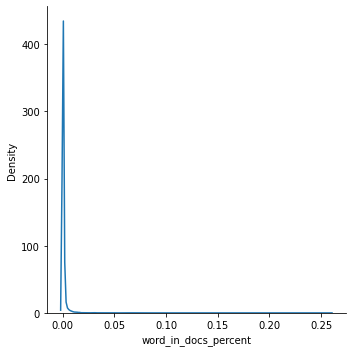

In [88]:
# 문서에 나타나는 빈도
sns.displot(wc['word_in_docs_percent'],kind='kde')

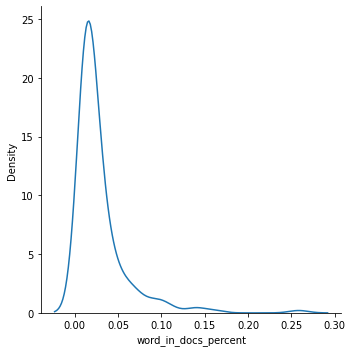

In [89]:
# 문서에 나타나는 빈도 1% 이상값
wc = wc[wc['word_in_docs_percent'] >= 0.01]
sns.displot(wc['word_in_docs_percent'], kind='kde');

In [90]:
wc

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
64,great,2709,3080,1.0,0.023660,0.023660,0.258418
77,batteries,1454,2073,2.0,0.015925,0.039585,0.138701
11,good,1688,1870,3.0,0.014365,0.053950,0.161023
66,tablet,1469,1752,4.0,0.013459,0.067409,0.140132
69,love,1183,1287,5.0,0.009887,0.077296,0.112849
...,...,...,...,...,...,...,...
577,bit,109,112,177.0,0.000860,0.450739,0.010398
941,fine,108,112,178.0,0.000860,0.451600,0.010302
317,pay,107,111,179.0,0.000853,0.452452,0.010207
879,value.,108,108,181.0,0.000830,0.454119,0.010302


In [91]:
print(wc.shape)
wc

(177, 7)


,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
64,great,2709,3080,1.0,0.023660,0.023660,0.258418
77,batteries,1454,2073,2.0,0.015925,0.039585,0.138701
11,good,1688,1870,3.0,0.014365,0.053950,0.161023
66,tablet,1469,1752,4.0,0.013459,0.067409,0.140132
69,love,1183,1287,5.0,0.009887,0.077296,0.112849
...,...,...,...,...,...,...,...
577,bit,109,112,177.0,0.000860,0.450739,0.010398
941,fine,108,112,178.0,0.000860,0.451600,0.010302
317,pay,107,111,179.0,0.000853,0.452452,0.010207
879,value.,108,108,181.0,0.000830,0.454119,0.010302


### 어간 추출과 표제어 추출 예시 
어간: 단어에서 조사 등의 표현을 제거한 값 (wolves => wolv)  
표제어: 단어의 기본 사전형 원형 (are => be, mice=>mouse, running=>run)

In [92]:
# spacy는 표제어추출만 지원하기 때문에 nltk의 어간추출 라이브러리 사용 
# 예시 
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["wolf", "wolves"]

for word in words:
    print(ps.stem(word))

wolf
wolv


In [93]:
# 샘플 데이터 어간추출
tokens = []
for doc in df['tokenized_review']:
    doc_tokens = []
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df['stems'] = tokens

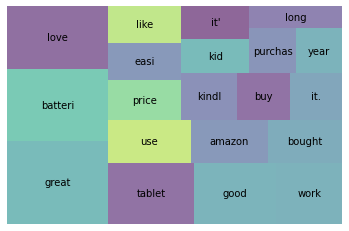

In [94]:
# 결과 시각화
wc = word_count(df['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

In [98]:
# 표제어 추출
# 느리고 연산량이 많음
lem = "The social wolf. Wolves are complex."

nlp = spacy.load("en_core_web_sm")

doc = nlp(lem)

for token in doc:
    print(token.text, token.lemma_)

The the
social social
wolf wolf
. .
Wolves wolf
are be
complex complex
. .
